In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
sig_1 = 2
me_1 = 5
sig_2 = 1.4
me_2 = 4


In [5]:
x = np.linspace(1,8,1000)
%matplotlib inline

A = lambda x: ((1/sig_1*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_1))*(x-me_1)**2) * 0.5) + ((1/sig_2*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_2))*(x-me_2)**2) * 0.5) 
tp = ((1/sig_1*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_1))*(x-me_1)**2) * 0.5) + ((1/sig_2*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_2))*(x-me_2)**2) * 0.5) 

#B = lambda x:  1/ ((1/sig_2*np.sqrt(2*np.pi))*np.exp((-1/2*sig_2)*(x-me_2)**2) * x) 

In [6]:
from scipy import integrate

In [7]:
integrate.quad( A, 1, 8)
#integrate.quad( B, 1, 8)

(4.817859947753188, 5.3488990434149435e-14)

In [13]:
y_int = integrate.cumtrapz(x, tp, initial=0)


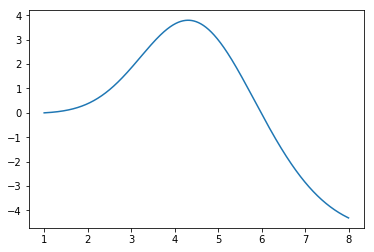

In [14]:
import matplotlib.pyplot as plt
plt.plot(x, y_int)

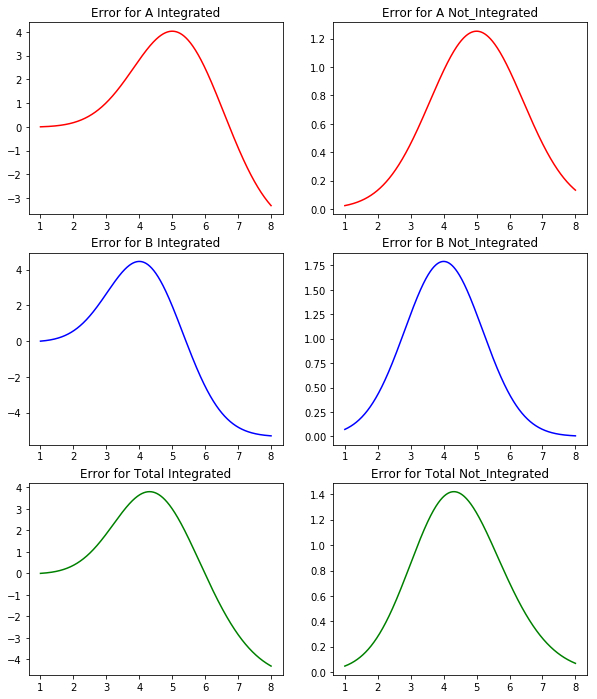

In [24]:
sample_1 = ((1/sig_1*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_1))*(x-me_1)**2))  
sample_2 = ((1/sig_2*np.sqrt(2*np.pi))*np.exp((-1/(2*sig_2))*(x-me_2)**2))

y_int_a = integrate.cumtrapz(x, sample_1, initial=0)
y_int_b = integrate.cumtrapz(x, sample_2, initial=0)
y_int = integrate.cumtrapz(x, tp, initial=0)

fig, ax = plt.subplots(3, 2, figsize=(10,12))
ax[0,0].plot(x, y_int_a, c='r')
ax[0,0].set_title('Error for A Integrated')
ax[0,1].plot(x, sample_1, c='r')
ax[0,1].set_title('Error for A Not_Integrated')

ax[1,0].plot(x, y_int_b, c='b')
ax[1,0].set_title('Error for B Integrated')
ax[1,1].plot(x, sample_2, c='b')
ax[1,1].set_title('Error for B Not_Integrated')

ax[2,0].plot(x, y_int, c='g')
ax[2,0].set_title('Error for Total Integrated')
ax[2,1].plot(x, tp, c='g')
ax[2,1].set_title('Error for Total Not_Integrated')

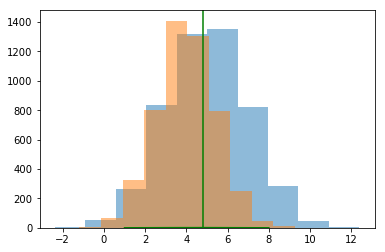

In [35]:
num_samples = 5000
a_1 = np.random.randn(num_samples)*sig_1 + me_1
a_2 = np.random.randn(num_samples)*sig_2 + me_2
#plt.scatter(a_1, (range(len(a_1))))
plt.hist(a_1, alpha=0.5)
plt.hist(a_2, alpha=0.5)
plt.plot(x, tp, c='g')
plt.axvline(4.82, c='g')
#plt.ylim(0,400)